## Notebook to broswe the detected eQTL result for items of interest

#### import libraries and set notebook variables

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# parameter variables
cohort = 'ppmi'
amp_abbr = 'PP'
version = 'amppdv1'
tissue = 'wb'
visit = 0
visit_name = 'BLM0T1'

In [15]:
# naming
cohort_version = f'{cohort}.{version}'
cohort_build = f'{cohort}.{tissue}{visit}'


# directories
wrk_dir = f'/labshare/raph/eqtl/{cohort}'
geno_dir = f'{wrk_dir}/genotypes'
expr_dir = f'{wrk_dir}/expression'
info_dir = f'{wrk_dir}/sample_info'
plink_out_dir = f'{wrk_dir}/plink/output'
results_dir = f'{wrk_dir}/results'

# input files
gencode_pkl = '/labshare/raph/datasets/amppd/expression/gencode.v29.primary_assembly.annotation.pkl'
expr_pheno_file = '{exprdir}/{cohortbuild}.chr{chr}.pheno'
pfiles = '{genodir}/{cohortbuild}.chr{chr}'
genome_index_file = '/labseq/Genomes/GRCh38_hg38/broad.v0/Homo_sapiens_assembly38.fasta.fai'
eqtl_results_file = f'{results_dir}/{cohort_build}.eqtl.hdf5'

# output files
eqtl_psam = f'{info_dir}/{cohort_build}.psam'
chr_detected_out_file = '{exprdir}/{cohortbuild}.detected.genes.chr{chr}'
plink_glm_out_dir = f'{plink_out_dir}/glm'

# constant values
autosomes = [str(x) for x in list(range(1,23))]
max_dist = 1000000
max_threads = 24
alpha_value = 0.05

# items of interest
genes = ['SNCA', 'LRRK2', 'GBA', 'CHURC1']
# meta5_cojo_file = '/labshare/raph/spd/finemap/meta5v2/cojo/results.jma.cojo.csv'
meta5_cojo_file = '/labshare/raph/spd/finemap/meta5v2/table_s2.csv'

#### load the gencode annotations

In [16]:
gencode_df = pd.read_pickle(gencode_pkl)
print(gencode_df.shape)
chr_lengths_df = pd.read_csv(genome_index_file, header=None, sep='\t')
print(chr_lengths_df.shape)

(2742734, 91)
(3366, 5)


#### load the detected eQTL

In [17]:
eqtl_df = pd.read_hdf(eqtl_results_file)
print(eqtl_df.shape)
number_genes = len(eqtl_df['gene_id'].unique())
print(f'detected eqtl for {number_genes} genes')
eqtl_df.head()

(2728625, 15)
detected eqtl for 14862 genes


,#CHROM,POS,ID,REF,ALT,A1,A1_CT,A1_FREQ,OBS_CT,BETA,SE,T_STAT,P,gene_id,bh_fdr
1297,1,169064836,rs138545701,A,C,C,45,0.018860,1193,0.525651,0.151906,3.46037,0.000559,ENSG00000000457.13,0.029006
1425,1,169088691,rs1055935687,CATTA,C,C,31,0.012993,1193,0.716060,0.181646,3.94206,0.000085,ENSG00000000457.13,0.006076
1817,1,169154244,rs550386665,C,A,A,39,0.016345,1193,0.727401,0.162201,4.48456,0.000008,ENSG00000000457.13,0.000757
2650,1,169317449,rs114559680,C,T,T,39,0.016345,1193,0.727401,0.162201,4.48456,0.000008,ENSG00000000457.13,0.000757
2735,1,169336159,rs146168607,G,A,A,39,0.016345,1193,0.727401,0.162201,4.48456,0.000008,ENSG00000000457.13,0.000757


In [18]:
genes_oi_df = gencode_df.loc[gencode_df['gene_name'].isin(genes)]
print(genes_oi_df.shape)
gene_ids = genes_oi_df['gene_id'].unique()
print(gene_ids)
gene_names = genes_oi_df['gene_name'].unique()
print(gene_names)
genes_oi_df.head()

(784, 91)
['ENSG00000177628.15' 'ENSG00000145335.15' 'ENSG00000188906.15'
 'ENSG00000258289.8']
['GBA' 'SNCA' 'LRRK2' 'CHURC1']


,seqname,source,feature,start,end,score,strand,frame,ccdsid,exon_id,...,tag:retrogene,tag:seleno,tag:semi_processed,tag:sequence_error,tag:upstream_ATG,tag:upstream_uORF,transcript_id,transcript_name,transcript_support_level,transcript_type
163215,chr1,HAVANA,gene,155234452,155244699,.,-,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163216,chr1,HAVANA,transcript,155234452,155241234,.,-,.,CCDS1102.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000368373.7,GBA-202,1,protein_coding
163217,chr1,HAVANA,exon,155241086,155241234,.,-,.,CCDS1102.1,ENSE00001890492.1,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000368373.7,GBA-202,1,protein_coding
163218,chr1,HAVANA,CDS,155241086,155241112,.,-,0,CCDS1102.1,ENSE00001890492.1,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000368373.7,GBA-202,1,protein_coding
163219,chr1,HAVANA,start_codon,155241110,155241112,.,-,0,CCDS1102.1,ENSE00001890492.1,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000368373.7,GBA-202,1,protein_coding


In [19]:
eqtl_genes_oi_df = eqtl_df.loc[eqtl_df['gene_id'].isin(genes_oi_df['gene_id'])]
print(eqtl_genes_oi_df.shape)
print(eqtl_genes_oi_df['gene_id'].unique())
print(genes_oi_df.loc[genes_oi_df['gene_id'].isin(eqtl_genes_oi_df['gene_id']), 
                      ['gene_name']]['gene_name'].unique())

(1456, 15)
['ENSG00000177628.15' 'ENSG00000145335.15' 'ENSG00000188906.15'
 'ENSG00000258289.8']
['GBA' 'SNCA' 'LRRK2' 'CHURC1']


#### load the variants of interest

In [20]:
variants_oi_df = pd.read_csv(meta5_cojo_file)
print(variants_oi_df.shape)
variants_oi_df.head()

(118, 12)


,SNP,CHR,BP,NearestGene,QTLNominatedGene,Effectallele,Otherallele,EAF,Beta,SE,P,P_COJO
0,rs147288664,1,152192927,HRNR,NaN,c,g,0.9905,1.1782,0.1571,6.330000e-14,6.460000e-14
1,rs114138760,1,154898185,PMVK,NaN,c,g,0.0112,0.2812,0.0478,4.190000e-09,1.090000e-08
2,rs35749011,1,155135036,KRTCAP2,EFNA3,a,g,0.0169,0.6068,0.0342,1.720000e-70,3.820000e-77
3,rs76763715,1,155205634,GBAP1,NaN,t,c,0.9953,-0.7467,0.0765,1.590000e-22,9.900000e-23
4,rs143756968,1,155376741,ASH1L,NaN,a,g,0.9922,-0.6314,0.0963,5.590000e-11,7.160000e-12


In [21]:
eqtl_variants_oi_df = eqtl_df.loc[eqtl_df['ID'].isin(variants_oi_df['SNP'])]
print(eqtl_variants_oi_df.shape)
this_cnt = len(eqtl_variants_oi_df['ID'].unique())
print(f'variants {this_cnt}')
this_cnt = len(eqtl_variants_oi_df['gene_id'].unique())
print(f'genes {this_cnt}')
found_genes = gencode_df.loc[gencode_df['gene_id'].isin(eqtl_variants_oi_df['gene_id']),
                       ['gene_name']]['gene_name'].unique()
print(found_genes)

(221, 15)
variants 58
genes 137
['PBXIP1' 'RF00017' 'FLAD1' 'ZBTB7B' 'EFNA4' 'SLC50A1' 'DPM3' 'KRTCAP2'
 'THBS3' 'ASH1L' 'ASH1L-AS1' 'SYT11' 'SCARNA4' 'FCGR2B' 'VAMP4' 'PIGC'
 'RAB29' 'ITPKB' 'COQ8A' 'MAL' 'LINC01127' 'CCNT2-AS1' 'ZNF589' 'NME6'
 'TREX1' 'ARIH2' 'WDR6' 'GPX1' 'IQCB1' 'AC083798.2' 'KPNA1' 'PARP9'
 'PARP15' 'AC092953.1' 'SLC49A3' 'DGKQ' 'IDUA' 'FGFRL1' 'RNF212' 'CPEB2'
 'FAM200B' 'LAP3' 'DCAF16' 'LCORL' 'NAAA' 'NEK1' 'CLCN3' 'NDUFAF2' 'PAM'
 'GIN1' 'PPIP5K2' 'CAMLG' 'TXNDC15' 'HIST1H2AL' 'HIST1H4L' 'AL121944.1'
 'ZSCAN16-AS1' 'ZSCAN16' 'ZKSCAN8' 'ZKSCAN4' 'HLA-V' 'HLA-A' 'ZNRD1ASP'
 'HLA-L' 'HCG18' 'IER3' 'LINC00243' 'AL662844.4' 'HLA-C' 'HLA-B' 'MICB'
 'DDAH2' 'C4A' 'HLA-DRB5' 'HLA-DRB1' 'HLA-DQB1' 'NUPL2' 'CRCP' 'LINC00174'
 'AC027644.3' 'PMS2P4' 'BLK' 'NEIL2' 'FDFT1' 'CTSB' 'AC145124.1'
 'AC130352.1' 'XPO7' 'C8orf58' 'CCAR2' 'AC037459.3' 'BORCS7' 'MRVI1-AS1'
 'CCDC90B' 'DNM1L' 'SLC2A13' 'LRRK2' 'MPHOSPH9' 'CDADC1' 'SLC25A21' 'GALC'
 'GPR65' 'LINC01146' 'SGF29' 'TUFM' 

#### check intersect between genes of interest and genes from variants of interest

In [22]:
print(set(genes) & set(found_genes))

{'LRRK2'}


#### check all the genes of interest regardless of detectable eQTL

In [10]:
#plot local manhattan for gene eQTL
def plot_eqtl_manhattan(gene_id, gene_name, gene_chrom, gene_start, gene_stop, eqtl_df):
    print(f'{gene_name} {gene_id}')
    print(f'gene {gene_name} is on {gene_chrom} from {gene_start} to {gene_stop}')

    #pull in all results for the gene from chromosome for all visits
    gene_results_df = eqtl_df.loc[eqtl_df['gene_id'] == gene_id]
    print(gene_results_df.shape)

    if not gene_results_df is None and gene_results_df.shape[0] > 0:
        #get suggestive results counts
        temp_results_df = gene_results_df.loc[gene_results_df['bh_fdr'] <= alpha_value]
        print(temp_results_df.shape)

        #create some cleaner data columns for plotting purposes
        gene_results_df['log10_bh_pvalue'] = np.log10(gene_results_df['bh_fdr'])*-1
        gene_results_df['log10_pvalue'] = np.log10(gene_results_df['P'])*-1
        gene_results_df['z_score'] = gene_results_df['BETA']/gene_results_df['SE']
        gene_results_df['z_score_abs'] = np.abs(gene_results_df['z_score'])

        #now actually do the plotting
        sns.set(style='darkgrid')
        sns.relplot(x='POS',y='log10_pvalue',size='z_score_abs', \
                    alpha=.5, palette="dark", height=12, data=gene_results_df)

        min_y = round(min(gene_results_df['log10_pvalue']))

        plt.plot([gene_start, gene_stop], [min_y, min_y], linewidth=3)
        plt.text(gene_stop+10000,min_y,gene_name,fontsize='small')

        plt.title(f'{gene_name} eQTL',fontsize='large') 
        plt.show()

#     plot_out_file_name = f'{WRKDIR}/plink/images/{gene_name}.local_man.png'
#     plt.savefig(plot_out_file_name,format='png',dpi=600,bbox_inches='tight')
    
    return

chr1
(9006149, 15)
(3712, 15)
GBA ENSG00000177628.15
gene GBA is on chr1 from 155234452 to 155244699
(3712, 15)
(116, 15)


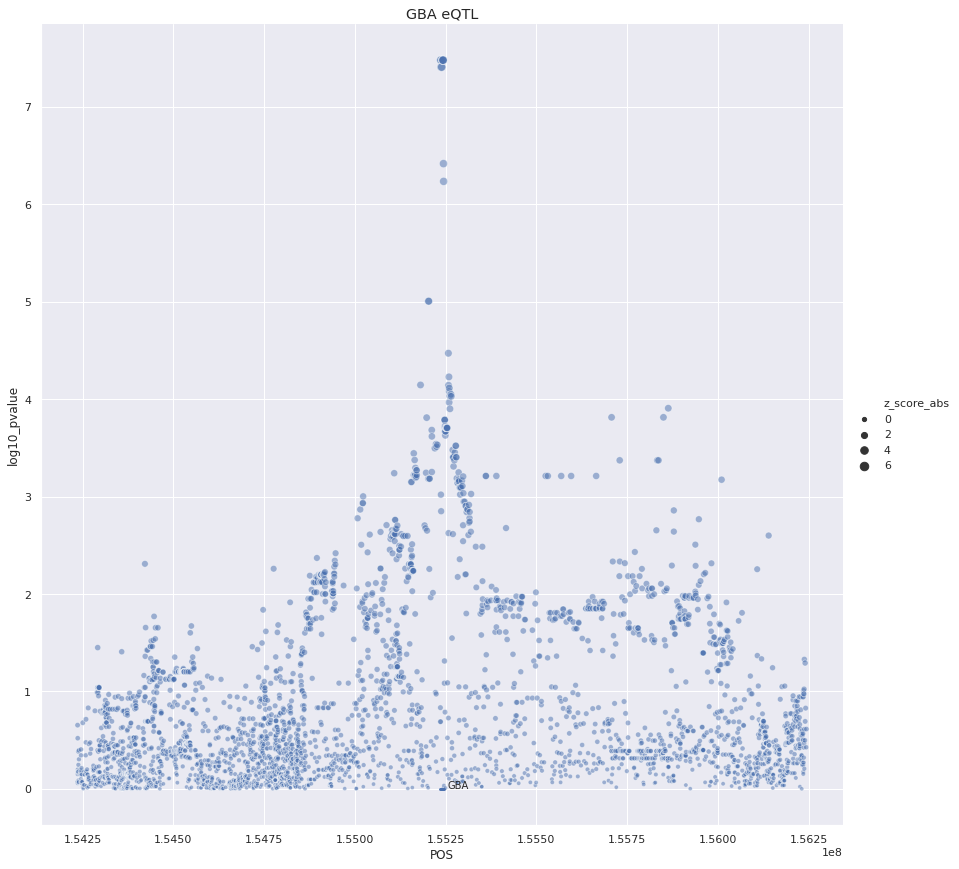

chr4
(4308513, 15)
(7092, 15)
SNCA ENSG00000145335.15
gene SNCA is on chr4 from 89724099 to 89838315
(7092, 15)
(213, 15)


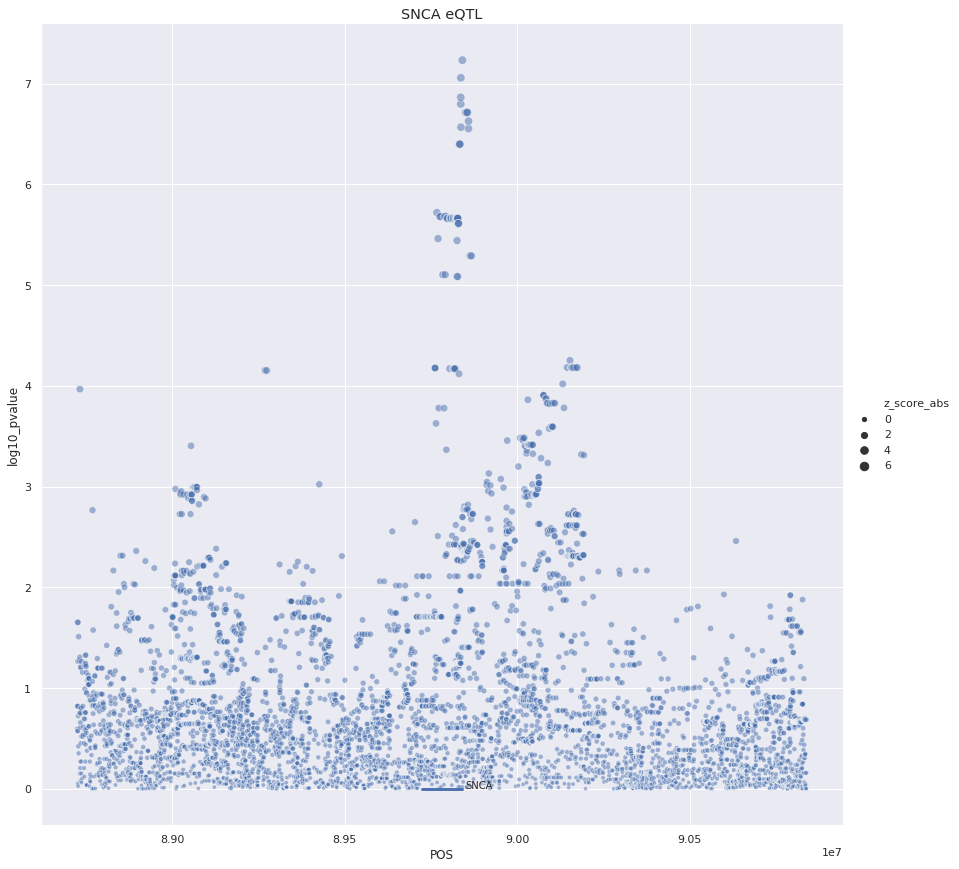

chr12
(5760000, 15)
(7160, 15)
LRRK2 ENSG00000188906.15
gene LRRK2 is on chr12 from 40196744 to 40369285
(7160, 15)
(843, 15)


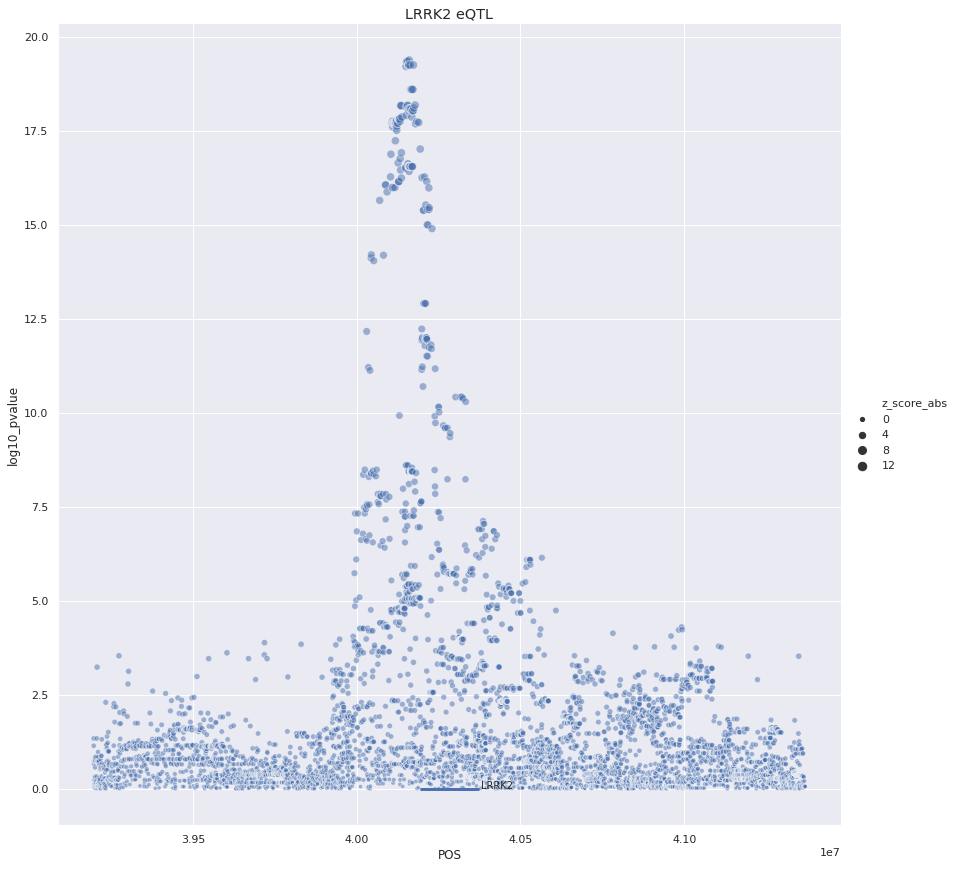

chr14
(4468649, 15)
(6227, 15)
CHURC1 ENSG00000258289.8
gene CHURC1 is on chr14 from 64914361 to 64944591
(6227, 15)
(284, 15)


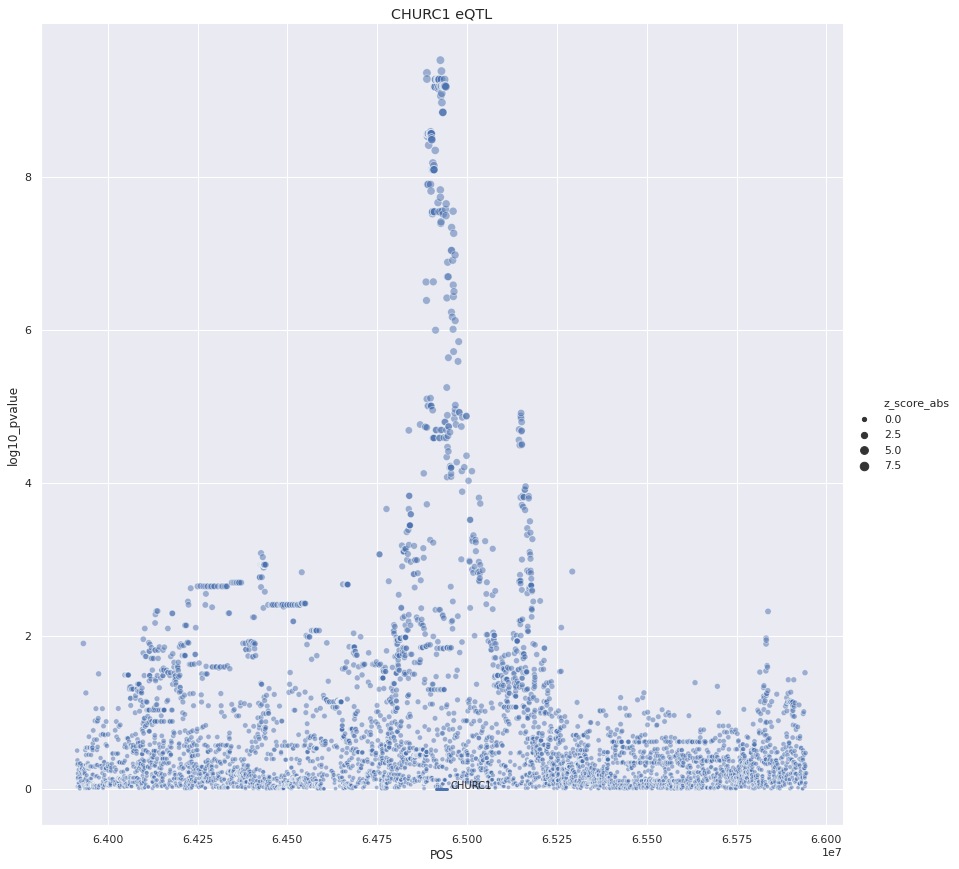

CPU times: user 23.3 s, sys: 6.68 s, total: 30 s
Wall time: 38 s


In [11]:
%%time

# gene_results_dict = {}

# gene_name = 'CTSB'
# variants_to_highlight = {'rs1293298':11854934}

# gene_results_dict[gene_name] = plot_eqtl_manhattan(gene_name, variants_to_highlight)

for gene_id in gene_ids:
    gene_df = genes_oi_df.loc[genes_oi_df['gene_id'] == gene_id]
    print(gene_df['seqname'].unique()[0])
    chrom = gene_df['seqname'].unique()[0]
    gene_name = gene_df['gene_name'].unique()[0]
    gene_start = gene_df['start'].min()
    gene_stop = gene_df['end'].max()
    # now load the chromosome eqtl results and extract specific gene results
    chrom_eqtl_df = pd.read_hdf(f'{plink_glm_out_dir}/{cohort_build}.{chrom}.glm.hdf5')
    print(chrom_eqtl_df.shape)
    gene_eqtl_df = chrom_eqtl_df.loc[chrom_eqtl_df['gene_id'] == gene_id]
    print(gene_eqtl_df.shape)
    plot_eqtl_manhattan(gene_id, gene_name, chrom, gene_start, gene_stop, gene_eqtl_df)